In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn import datasets

/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size change

In [2]:
ops.reset_default_graph()

In [3]:
sess = tf.Session()

In [4]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [5]:
learning_rate = 0.05
batch_size = 25

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [6]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [7]:
loss = tf.reduce_mean(tf.square(y_target - model_output))

init = tf.global_variables_initializer()
sess.run(init)

optimize = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = optimize.minimize(loss)

In [8]:
loss_vec = []

for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    fd = {
        x_data: rand_x,
        y_target: rand_y,
    }
    sess.run(train_step, feed_dict=fd)
    
    temp_loss = sess.run(loss, feed_dict=fd)
    loss_vec.append(temp_loss)
    
    if (i+1)%25 == 0:
        print('Step #{} A={} b={}'.format(i+1, sess.run(A), sess.run(b)))
        print('Loss = {}'.format(temp_loss))

Step #25 A=[[1.486437]] b=[[3.9302053]]
Loss = 0.6284466981887817
Step #50 A=[[1.259528]] b=[[4.291926]]
Loss = 0.24527320265769958
Step #75 A=[[1.1116853]] b=[[4.488891]]
Loss = 0.3284332752227783
Step #100 A=[[1.0081311]] b=[[4.599976]]
Loss = 0.1811128407716751


In [9]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

best_fit = []
for i in x_vals:
    best_fit.append(slope*i + y_intercept)


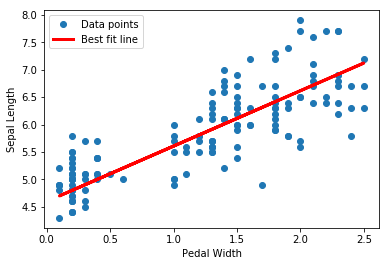

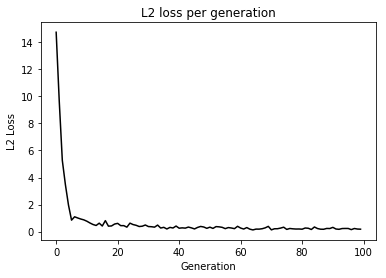

In [10]:
plt.plot(x_vals, y_vals, 'o', label='Data points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

    
plt.plot(loss_vec, 'k-')
plt.title('L2 loss per generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()